In [17]:
import yfinance as yf 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [18]:
sp500_daily=yf.download("^GSPC",start="2000-01-01",progress=False)
vix_daily=yf.download("^VIX",start="2000-01-01",progress=False)

In [19]:
sp500_daily.head(),vix_daily.head()

(Price             Close         High          Low         Open      Volume
 Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
 Date                                                                      
 2000-01-03  1455.219971  1478.000000  1438.359985  1469.250000   931800000
 2000-01-04  1399.420044  1455.219971  1397.430054  1455.219971  1009000000
 2000-01-05  1402.109985  1413.270020  1377.680054  1399.420044  1085500000
 2000-01-06  1403.449951  1411.900024  1392.099976  1402.109985  1092300000
 2000-01-07  1441.469971  1441.469971  1400.729980  1403.449951  1225200000,
 Price           Close       High        Low       Open Volume
 Ticker           ^VIX       ^VIX       ^VIX       ^VIX   ^VIX
 Date                                                         
 2000-01-03  24.209999  26.150000  23.980000  24.360001      0
 2000-01-04  27.010000  27.180000  24.799999  24.940001      0
 2000-01-05  26.410000  29.000000  25.850000  27.980000      0
 2000-01-06  

In [20]:
data_daily=pd.concat([sp500_daily["Close"],vix_daily["Close"]],axis=1,join="inner")
data_daily.columns=["SP500_Close","VIX_Close"]


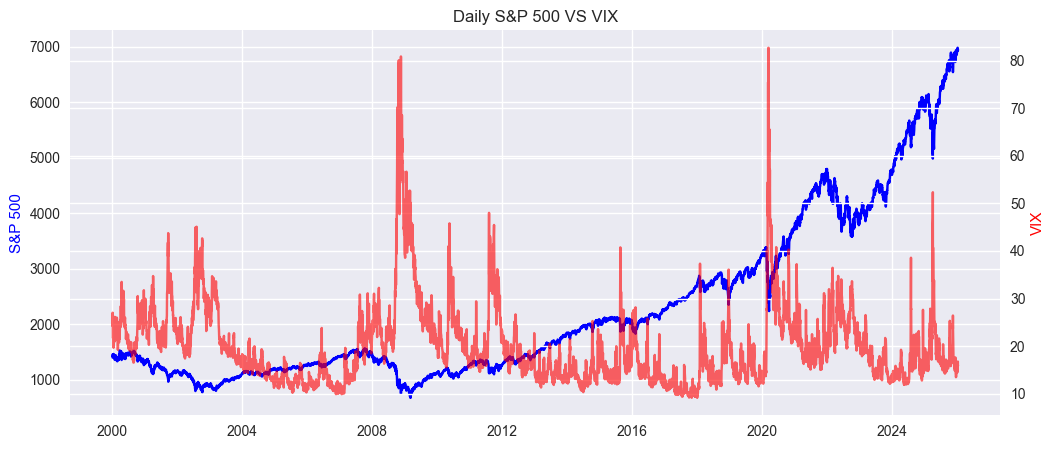

In [21]:
fig , ax1=plt.subplots(figsize=(12,5))
ax1.plot(data_daily.index,data_daily["SP500_Close"],color="blue")
ax1.set_ylabel("S&P 500",color="blue")
ax2=ax1.twinx()
ax2.plot(data_daily.index,data_daily["VIX_Close"],color="red",alpha=0.6)
ax2.set_ylabel("VIX", color="red")
plt.title("Daily S&P 500 VS VIX")
plt.show()

In [22]:
data_weekly=data_daily.resample("W-FRI").last()

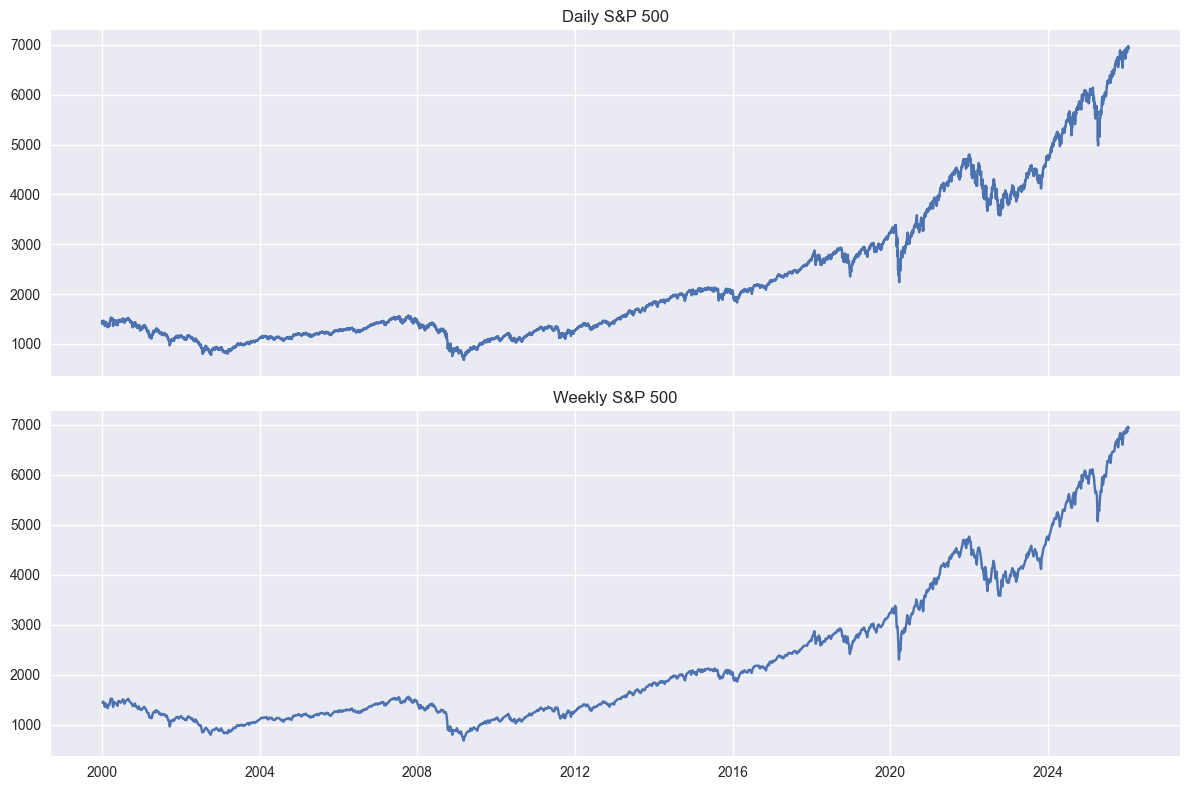

In [23]:
fig , axes=plt.subplots(2,1,figsize=(12,8),sharex=True)
axes[0].plot(data_daily.index,data_daily["SP500_Close"])
axes[0].set_title("Daily S&P 500")
axes[1].plot(data_weekly.index,data_weekly["SP500_Close"])
axes[1].set_title("Weekly S&P 500")
plt.tight_layout()
plt.show()

In [24]:
data_daily.to_csv("../data/raw/sp500_daily.csv")
data_weekly.to_csv("../data/raw/sp500_weekly.csv")